<a href="https://colab.research.google.com/github/sushilsahoo06/Pytorch/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [29]:
# #linear regression
# class linear_regression:
# #initiating the parameters(learning rate & no. of iterations)
#     def __init__(self,learning_rate,no_of_iterations):
#       self.learnin_rate=learning_rate
#       self.no_of_iterartions=no_of_iterations

#     def fit(self,X,Y):
#       #no of traning examples & no of features
#       # returns (number of samples, number of features).
#       #self.m is the number of training examples (rows).
#       #self.n is the number of features (columns).
#       self.m,self.n=X.shape
#       #initiating the wight & bias
#       self.w=np.zeros(self.n)
#       self.b=0
#       self.X=X
#       self.Y=Y
#       #implementing gradient descent
#       for i in range(self.no_of_iterations):
#         self.update_weights()

#       def update_weights(self,):
#         Y_prediction=self.predict(self.X)
#         #calculate gradients
#         dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
#         db=-2*np.sum(self.y-Y_prediction)/self.m
#         #updating the weights
#         self.w=self.w-self.learnin_rate*dw
#         self.b=self.b-self.learnin_rate*db


#         def predict(self,X):
#           return X.dot(self.w)+self.b#-->y=mx+c





In [32]:
import numpy as np

# linear regression
class LinearRegression:
    # initiating the parameters (learning rate & no. of iterations)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
      #no of traning examples & no of features
      # returns (number of samples, number of features).
      #self.m is the number of training examples (rows).
      #self.n is the number of features (columns).
        # no of training examples & no of features
        self.m, self.n = X.shape
        # initializing the weight & bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)
        # calculate gradients
        dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = -2 * np.sum(self.Y - Y_prediction) / self.m
        # updating the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b  # --> y = mx + c


using Linear Regressions model for predections

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt

In [34]:
#data pre-processing
salary_data=pd.read_csv('/content/salary_data (1).csv')


In [35]:
#print the frist 5 column of the data frame
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [36]:
# last 5-rows of data frame
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [37]:
#number of rows & column
salary_data.shape

(30, 2)

In [38]:
#cheacking missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the feature & target

In [39]:
x=salary_data.iloc[:,:-1].values#split the last data sets
y=salary_data.iloc[:,1].values# split the 2nd column 0-1

In [40]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [18]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Spliting the dataset into training & test data

In [41]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.33,random_state=2)
#33% are test data & 67% data is train data
#it for reproducing the code -->random_state

Training the Linear Regrassion models

In [44]:
model=LinearRegression(learning_rate=0.02,no_of_iterations=1000)

In [45]:
model.fit(X_train,Y_train)

In [46]:
#printing the parameters values(Weight & bias)
print('weight =',model.w)
print('bias =',model.b)

weight = [9514.40099904]
bias = 23697.406507136307


Y=9514 X +23697



predect the salary value for for test data

In [47]:
test_data_predict=model.predict(X_test)

In [48]:
print(test_data_predict)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted value & acutual value

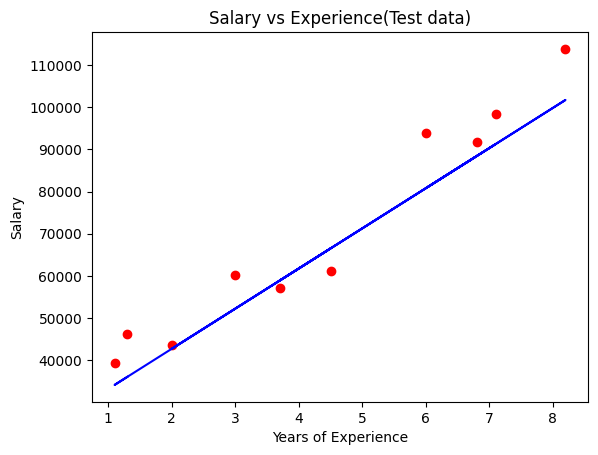

In [56]:
import matplotlib.pyplot as plt
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_predict,color='blue')
plt.title('Salary vs Experience(Test data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()